<a href="https://colab.research.google.com/github/Whitchurch/Tensorflow/blob/main/Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-GPU

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Point to the MNST numbers database

In [32]:
mnist = keras.datasets.mnist

Load the data

In [33]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

View the data

1
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.      

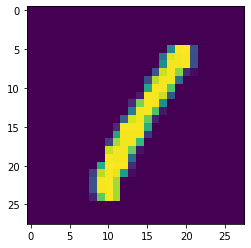

In [38]:
np.set_printoptions(linewidth=500)
picIndex = tf.Variable(3)
plt.imshow(training_images[picIndex])
print(training_labels[picIndex])
print(training_images[picIndex])

Normalize the data, so that the certain feature weights don't dominate the training.

In [35]:
training_images = training_images/255
test_images = test_images/255

View the normalized data

In [ ]:
plt.imshow(training_images[picIndex])
print(training_images[picIndex])

Now let us design the model: It has 128 neurons and 10 output softmax

In [47]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99): # Experiment with changing this value
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True


mycallbacks = myCallback()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[mycallbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2607 - accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1150 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0786 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0464 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0364 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9914

Reached 99% accuracy so cancelling training!


Send in training data into the model to see how it behaves

In [50]:
model.evaluate(test_images,test_labels)
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9773
[2.7598032e-10 1.3343663e-12 6.9377711e-07 1.3404792e-07 1.5241084e-13 4.6593202e-10 3.1026082e-15 9.9999905e-01 7.8634848e-08 9.1448150e-08]
7
